In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from DataProcessing import DataProcessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
# lendo os dados já processados 
dados = DataProcessing()
dados.shape

(13455, 6)

In [41]:
# separando os dados entre treinamento e teste
X, y = dados[:, :5], dados[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
alunos_particular = sum(X_train[:, 0] == 1)
alunos_particular_teste = sum(X_test[:, 0] == 1)
print(f"Número de alunos de escola particular no conjunto de treinamento: {alunos_particular} ({alunos_particular / len(X_train) * 100:.2f}%)")
print(f"Número de alunos de escola particular no conjunto de teste: {alunos_particular_teste} ({alunos_particular_teste / len(X_test) * 100:.2f}%)")
print(f"Porcentagem de alunos de escola particular no conjunto de dados: {sum(X[:, 0] == 1)/ len(X_train) * 100:.2f}%")

Número de alunos de escola particular no conjunto de treinamento: 656 (5.42%)
Número de alunos de escola particular no conjunto de teste: 82 (6.09%)
Porcentagem de alunos de escola particular no conjunto de dados: 6.09%


In [37]:
len(X_test)

82

In [38]:
len(X_train)

12109

****Regressão Linear Multipla****

In [43]:
regressao_linear = LinearRegression().fit(X_train, y_train)

print(f"Coeficientes {regressao_linear.coef_}")
print(f"Coeficiente linear {regressao_linear.intercept_}")

Coeficientes [0.04508405 0.3835035  0.18929176 0.11032189 0.05937353]
Coeficiente linear -0.014653617594376389


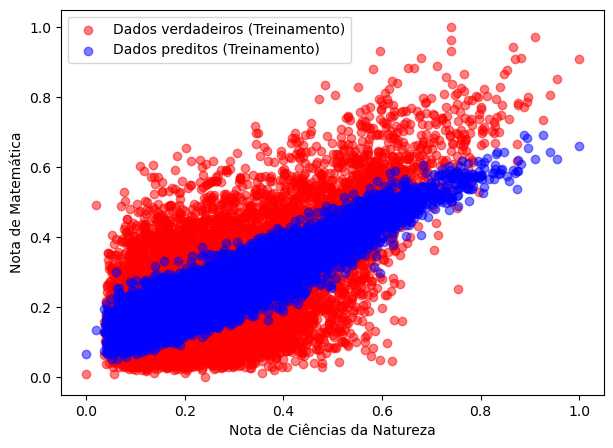

In [47]:
# Predicão no conjunto de treino
plt.figure(figsize=[7, 5])
y_predict = regressao_linear.predict(X_train)
plt.scatter(X_train[:, 1], y_train, color='red', label='Dados verdadeiros (Treinamento)', alpha=0.5)
plt.scatter(X_train[:, 1], y_predict, color='blue', label='Dados preditos (Treinamento)', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Nota de Ciências da Natureza')
plt.ylabel('Nota de Matemática')
plt.savefig('Plots/RL_Treino.pdf', format="pdf", bbox_inches="tight", dpi=300)

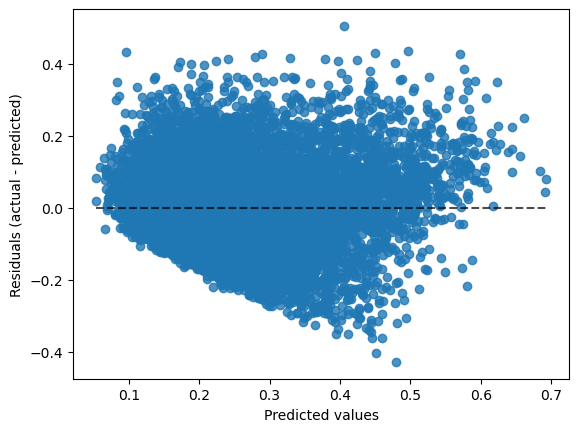

In [7]:
# Para notas mais baixas e mais altas, o modelo está subsestimando as notas dos alunos
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_predict)
display.plot()

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R^2 = ', r2_score(y_train, y_predict))
print('MSE = ', mean_squared_error(y_train, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_train, axis=0))
print('MAE = ', mean_absolute_error(y_train, y_predict))

R^2 =  0.45938821299220245
MSE =  0.011416460886939681  média (predito) = 0.25694999766896925  média (treinamento) = 0.25694999766896975
MAE =  0.08089891972513862


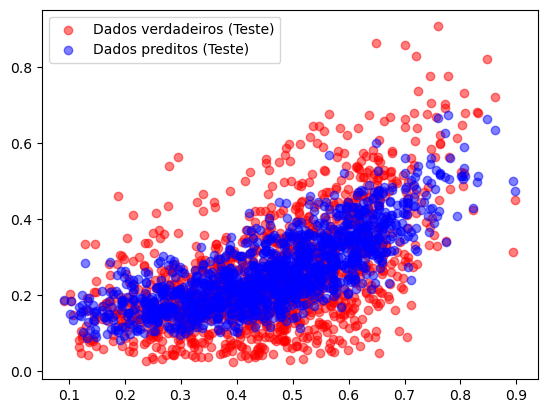

In [9]:
# Predicão no conjunto de teste
y_predict = regressao_linear.predict(X_test)
plt.scatter(X_test[:, 3], y_test, color='red', label='Dados verdadeiros (Teste)', alpha=0.5)
plt.scatter(X_test[:, 3], y_predict, color='blue', label='Dados preditos (Teste)', alpha=0.5)
plt.legend(loc='best')

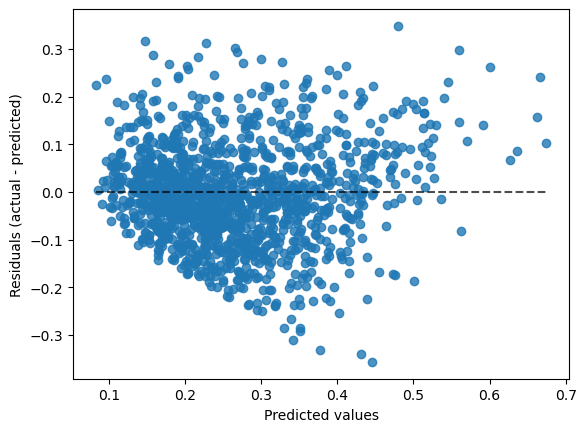

In [10]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_predict)
display.plot()

In [11]:
print('R^2 = ', r2_score(y_test, y_predict))
print('MSE = ', mean_squared_error(y_test, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_test, axis=0))
print('MAE = ', mean_absolute_error(y_test, y_predict))

R^2 =  0.502354262281389
MSE =  0.01071450420072562  média (predito) = 0.26341324951422557  média (treinamento) = 0.2567313608604245
MAE =  0.07976379915093638


****Regressão Lasso****

In [12]:
from sklearn.linear_model import Lasso

# Aumentando a punição, o modelo explica cada vez menos a variância dos dados
regressao_lasso = Lasso(alpha=0.003).fit(X_train, y_train)
print(f"Coeficientes {regressao_lasso.coef_}")
print(f"Coeficiente linear {regressao_lasso.intercept_}")

Coeficientes [0.0105553  0.3355174  0.16801584 0.05175933 0.        ]
Coeficiente linear 0.06748600880198305


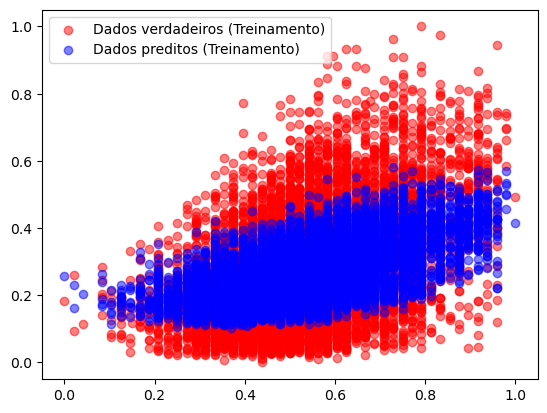

In [13]:
# Predicão no conjunto de treino
y_predict = regressao_lasso.predict(X_train)
plt.scatter(X_train[:, 4], y_train, color='red', label='Dados verdadeiros (Treinamento)', alpha=0.5)
plt.scatter(X_train[:, 4], y_predict, color='blue', label='Dados preditos (Treinamento)', alpha=0.5)
plt.legend(loc='best')

In [14]:
print('R^2 = ', r2_score(y_train, y_predict))
print('MSE = ', mean_squared_error(y_train, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_train, axis=0))
print('MAE = ', mean_absolute_error(y_train, y_predict))

R^2 =  0.4287618827741154
MSE =  0.012063217597481484  média (predito) = 0.2569499976689698  média (treinamento) = 0.25694999766896975
MAE =  0.0835211122911698


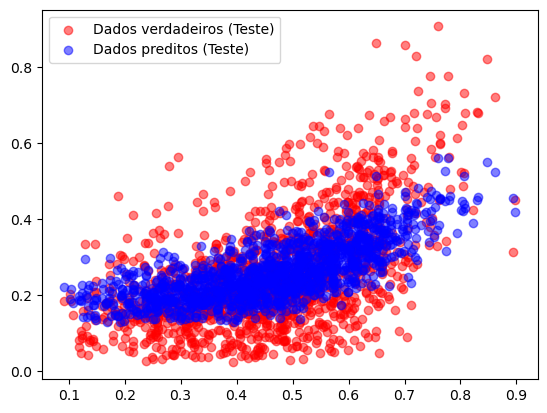

In [15]:
# Predicão no conjunto de teste
y_predict = regressao_lasso.predict(X_test)
plt.scatter(X_test[:, 3], y_test, color='red', label='Dados verdadeiros (Teste)', alpha=0.5)
plt.scatter(X_test[:, 3], y_predict, color='blue', label='Dados preditos (Teste)', alpha=0.5)
plt.legend(loc='best')

In [16]:
print('R^2 = ', r2_score(y_test, y_predict))
print('MSE = ', mean_squared_error(y_test, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_test, axis=0))
print('MAE = ', mean_absolute_error(y_test, y_predict))

R^2 =  0.4587690632465974
MSE =  0.011652910305213936  média (predito) = 0.262254557563582  média (treinamento) = 0.2567313608604245
MAE =  0.0838250555577687


****Regressão Ridge****

In [17]:
from sklearn.linear_model import Ridge

# Aumentando a punição, o modelo explica cada vez menos a variância dos dados
regressao_ridge = Ridge(alpha=1).fit(X_train, y_train)
print(f"Coeficientes {regressao_ridge.coef_}")
print(f"Coeficiente linear {regressao_ridge.intercept_}")

Coeficientes [0.04519438 0.38176921 0.18906298 0.11073804 0.05993378]
Coeficiente linear -0.01456159859596734


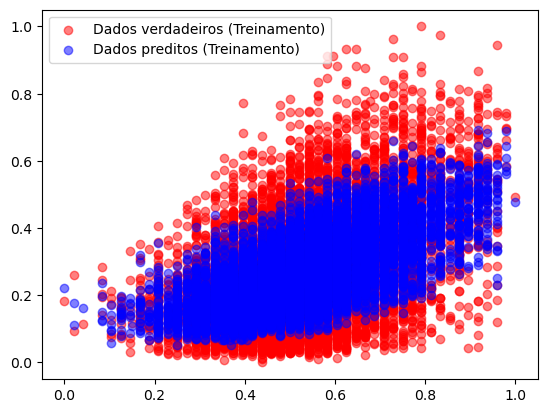

In [18]:
# Predicão no conjunto de treino
y_predict = regressao_ridge.predict(X_train)
plt.scatter(X_train[:, 4], y_train, color='red', label='Dados verdadeiros (Treinamento)', alpha=0.5)
plt.scatter(X_train[:, 4], y_predict, color='blue', label='Dados preditos (Treinamento)', alpha=0.5)
plt.legend(loc='best')

In [19]:
print('R^2 = ', r2_score(y_train, y_predict))
print('MSE = ', mean_squared_error(y_train, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_train, axis=0))
print('MAE = ', mean_absolute_error(y_train, y_predict))

R^2 =  0.4593857856485397
MSE =  0.0114165121467802  média (predito) = 0.25694999766896925  média (treinamento) = 0.25694999766896975
MAE =  0.08089492010081584


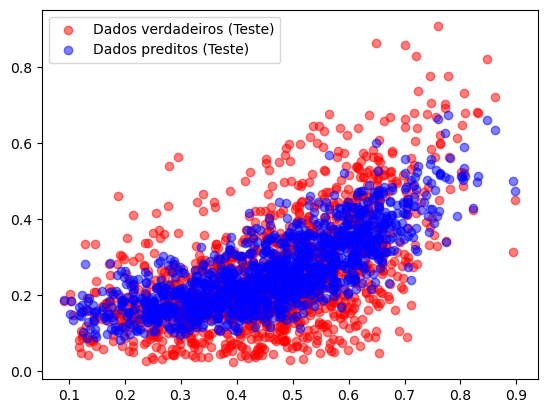

In [20]:
# Predicão no conjunto de teste
y_predict = regressao_ridge.predict(X_test)
plt.scatter(X_test[:, 3], y_test, color='red', label='Dados verdadeiros (Teste)', alpha=0.5)
plt.scatter(X_test[:, 3], y_predict, color='blue', label='Dados preditos (Teste)', alpha=0.5)
plt.legend(loc='best')

In [21]:
print('R^2 = ', r2_score(y_test, y_predict))
print('MSE = ', mean_squared_error(y_test, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_test, axis=0))
print('MAE = ', mean_absolute_error(y_test, y_predict))

R^2 =  0.502296795722929
MSE =  0.010715741477839344  média (predito) = 0.2633934813266754  média (treinamento) = 0.2567313608604245
MAE =  0.07976434985857656


****Polynomial Regression****

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

In [23]:
X_poly.shape

(13455, 20)

In [24]:
from sklearn.linear_model import Lasso

regressao_lasso = Lasso(alpha=0.00001).fit(X_train, y_train)
# print(f"Coeficiente linear {regressao_lasso.intercept_}")
features = ["TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
coefs_names = [f"{features[index1]} x {features[index2]}" for index1 in range(len(features)) for index2 in range(index1, len(features))]

for coef_name, coef in zip(["1"] + features + coefs_names, regressao_lasso.coef_):
    print(f"{coef_name}: {coef}")

1: 0.0
TP_ESCOLA: -0.22235367558792243
NU_NOTA_CN: 0.012200229841160896
NU_NOTA_CH: 0.04335272459036316
NU_NOTA_LC: 0.11237833709134615
NU_NOTA_REDACAO: 0.0
TP_ESCOLA x TP_ESCOLA: 0.029097176546554547
TP_ESCOLA x NU_NOTA_CN: 0.07649603627997106
TP_ESCOLA x NU_NOTA_CH: 0.0
TP_ESCOLA x NU_NOTA_LC: -0.02888435965343773
TP_ESCOLA x NU_NOTA_REDACAO: 0.7134739261575036
NU_NOTA_CN x NU_NOTA_CN: 0.20739475166895252
NU_NOTA_CN x NU_NOTA_CH: -0.0
NU_NOTA_CN x NU_NOTA_LC: 0.0
NU_NOTA_CN x NU_NOTA_REDACAO: 0.2600739938445049
NU_NOTA_CH x NU_NOTA_CH: -0.11542954950714512
NU_NOTA_CH x NU_NOTA_LC: -0.08802695568330383
NU_NOTA_CH x NU_NOTA_REDACAO: 0.24056675187046778
NU_NOTA_LC x NU_NOTA_LC: -0.1900357615293581
NU_NOTA_LC x NU_NOTA_REDACAO: 0.04662988687947612


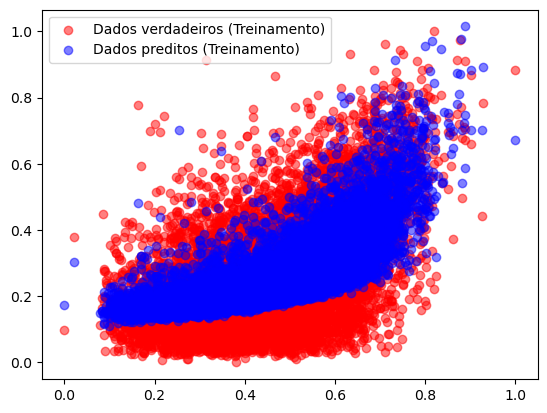

In [25]:
# Predicão no conjunto de treino
y_predict = regressao_lasso.predict(X_train)
plt.scatter(X_train[:, 3], y_train, color='red', label='Dados verdadeiros (Treinamento)', alpha=0.5)
plt.scatter(X_train[:, 3], y_predict, color='blue', label='Dados preditos (Treinamento)', alpha=0.5)
plt.legend(loc='best')

In [26]:
print('R^2 = ', r2_score(y_train, y_predict))
print('MSE = ', mean_squared_error(y_train, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_train, axis=0))
print('MAE = ', mean_absolute_error(y_train, y_predict))

R^2 =  0.5026705241307814
MSE =  0.01050243935784044  média (predito) = 0.25694999766896975  média (treinamento) = 0.25694999766896975
MAE =  0.07656835727230887


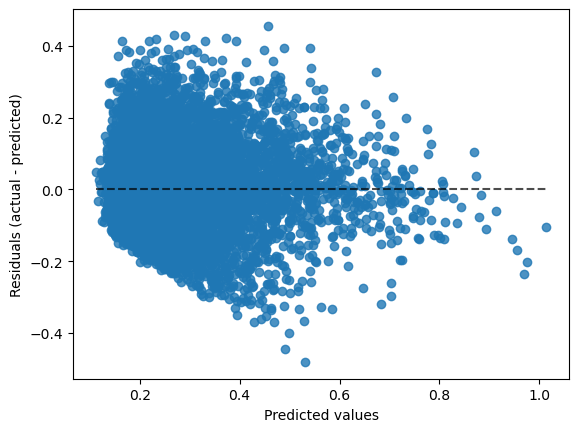

In [27]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_predict)
display.plot()

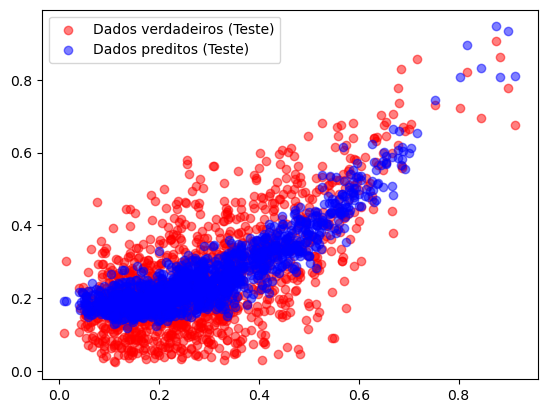

In [28]:
# Predicão no conjunto de teste
y_predict = regressao_lasso.predict(X_test)
plt.scatter(X_test[:, 1], y_test, color='red', label='Dados verdadeiros (Teste)', alpha=0.5)
plt.scatter(X_test[:, 1], y_predict, color='blue', label='Dados preditos (Teste)', alpha=0.5)
plt.legend(loc='best')

In [29]:
print('R^2 = ', r2_score(y_test, y_predict))
print('MSE = ', mean_squared_error(y_test, y_predict), " média (predito) =", np.mean(y_predict, axis=0), " média (treinamento) =", np.mean(y_test, axis=0))
print('MAE = ', mean_absolute_error(y_test, y_predict))

R^2 =  0.5414299067833741
MSE =  0.009873190540365652  média (predito) = 0.2623978467526374  média (treinamento) = 0.2567313608604245
MAE =  0.07598122068397399
